# importing libraries

In [1]:
import pandas as pd 
import numpy as np

# Read csv file

In [2]:
df = pd.read_csv('ccpp.csv')

In [3]:
df.head(30)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


# separating Dependent and independent variable 

In [4]:
x = df.drop(['PE'],axis = 1)
y = df['PE']

In [5]:
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [6]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

# Train The Model On Training Dataset

In [7]:
from sklearn.model_selection import train_test_split as tst
x_train,x_test,y_train,y_test = tst(x,y,test_size=0.3,random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

# Predicting The Test Set Data

In [11]:
y_pred = model.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [12]:
#y_pred = model.predict([[17,41.76,1024.07,73.17]])
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

# Evaluting the model

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477683

# plot the result

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'predicted values')

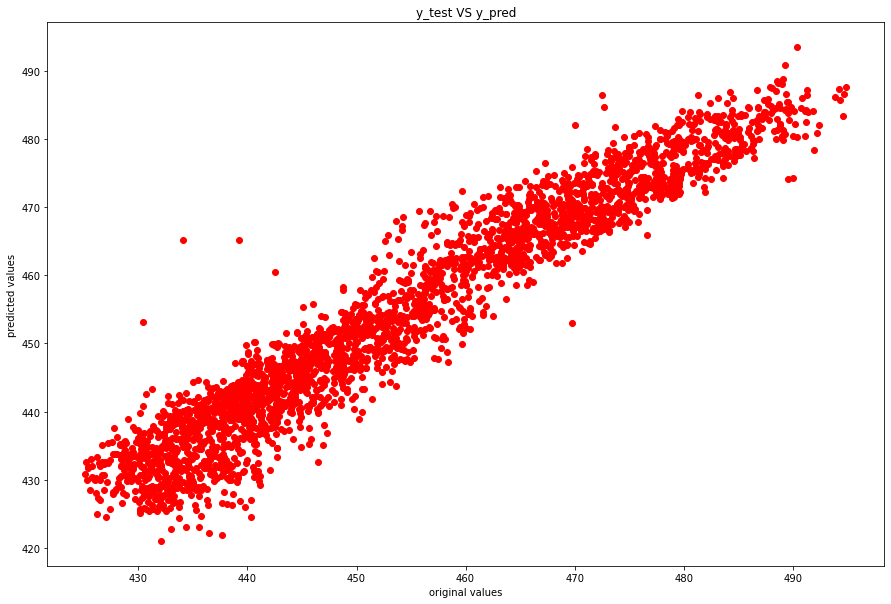

In [15]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_pred,color = 'r')
#plt.plot(y_test,y_pred)
plt.title('y_test VS y_pred')
plt.xlabel('original values')
plt.ylabel('predicted values')



# Predicted values

In [16]:
pred_df = pd.DataFrame({'Actual': y_test,'Predicted': y_test,'Difference':y_test - y_pred})

In [17]:
pred_df

,Actual,Predicted,Difference
4834,431.23,431.23,-0.172451
1768,460.01,460.01,1.395259
2819,461.14,461.14,-1.679674
7779,445.90,445.90,-2.701237
7065,451.29,451.29,-6.589479
...,...,...,...
9339,475.86,475.86,3.832766
4871,477.94,477.94,3.934478
5128,426.86,426.86,-5.613808
7947,433.40,433.40,-2.764172


# Mean squared error and mean absolute error

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
mean_squared_error(y_test,y_pred)

20.36838300288591

In [20]:
mean_squared_error(y_test,y_pred,squared=False)

4.513134498647909

In [21]:
mean_absolute_error(y_test,y_pred)

3.598266124779353

In [22]:
model.predict([[17,41.76,1024.07,73.17]])


array([463.34098612])

In [23]:
a = int(input('Enter AT (0-40) : '))
b = int(input('Enter V (20-80) : '))
c = int(input('Enter AP (1000-1050) : '))
d = int(input('Enter RH (50-100) : '))

Enter AT (0-40) : 20
Enter V (20-80) : 34
Enter AP (1000-1050) : 1037
Enter RH (50-100) : 58


In [24]:
model.predict([[a,b,c,d]])


array([462.56396114])